# Simulating Poisson Processes

In [1]:
import math
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Non-Homogeneous Poisson Process

In [13]:
# To simulate arrivals according to a
# Poisson process with time-varying rate
def GenTimeVaryingPP(T, rate_function, max_rate):
    # T is total time horizon
    # rate_function is a function that returns the rate at a given time
    # max_rate is the maximum rate of rate_function over T
    
    EventTimes = [] # initalise empty list of event times

    # Generate the first potential interarrival time
    U = np.random.uniform(0,1) # generate 1 sample of U(0,1)
    t = -math.log(1-U)/max_rate

    # Loop to generate event times
    while t < T:
        # Decide whether to count the potential arrival (thinning)
        U_admit = np.random.uniform(0,1)
        if U_admit <= rate_function(t)/max_rate:
            EventTimes.append(t)
        # Generate the next potential interarrival time
        U = np.random.uniform(0,1) # generate 1 sample of U(0,1)
        t = t -math.log(1-U)/max_rate
    
    return EventTimes

In [14]:
# Generate sample event times
T = 10
def rate_function(t):
    if t < T/2:
        return 1
    else:
        return 5
max_rate = 5
EventTimes = GenTimeVaryingPP(T,rate_function,max_rate)

In [15]:
# View output
print(EventTimes) # EventTimes is just a list of timings of occurrences
print(len(EventTimes))

[0.10574622948916271, 1.108284472313283, 1.4123861223878191, 3.4332636350767216, 3.903266733861422, 4.340705077110069, 5.231184454939905, 5.237594007190245, 5.6734195171144455, 5.750201733045192, 5.800884939625077, 6.094874764744043, 6.220857283753432, 6.4707072180297835, 6.536928349379873, 6.5794242440895685, 6.594311138246765, 6.648181655260944, 6.706260003989087, 6.757486943822423, 6.766670739981177, 7.148698674833656, 7.545847393676578, 7.678496194764739, 8.30431200203465, 8.393931435375817, 8.410765448063628, 8.689739272617647, 8.850990769610009, 8.921501768122557, 9.049765559884223, 9.111766354366297, 9.226891369807761, 9.588720367816887, 9.692922265743807, 9.931851731249013]
36


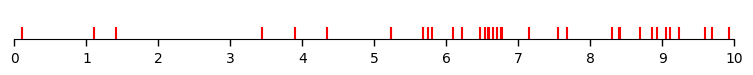

In [16]:
# Visualise output

# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 10)
    ax.set_ylim(-0.2, 1)
    ax.patch.set_alpha(0.0)
    
plt.figure(figsize=(8,0.3))
ax = plt.subplot(111)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.scatter(x=EventTimes,y=[0]*len(EventTimes),marker="|",color="red",s=100)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.show()

In [26]:
# Generate sample event times for another example
T = 10

# Sinusoidal rate function: varies smoothly between 0 and 5
def rate_function2(t):
    return 1+abs(T-5)
max_rate2 = 6
EventTimes = GenTimeVaryingPP(T,rate_function2,max_rate2)

In [27]:
# View output
print(EventTimes) # EventTimes is just a list of timings of occurrences
print(len(EventTimes))

[0.021826514983479723, 0.4541661275850572, 0.4836783186924032, 0.866400642941632, 0.8741878316145364, 0.8831288924015254, 1.0030721278855732, 1.1127295541655144, 1.3015917088079016, 1.8413563934245383, 1.9281568319400832, 1.9782058427267306, 2.698727539302723, 3.4563373932142443, 3.5089998689777393, 4.458344413659973, 4.78583324770949, 4.798315717713468, 5.113500219317073, 5.14812565614948, 5.232595039089617, 5.988066204687025, 6.080529139715989, 6.1463285405227355, 6.622802538201849, 6.8114457527695755, 7.040068126896974, 7.0866861969687465, 7.189899598456701, 7.190005936501174, 7.200578167123655, 7.241911593139103, 7.474654694685658, 7.654686304405556, 7.933471592945251, 8.337391824452418, 8.466037563520471, 8.483290674277159, 8.520640925457375, 8.563470695461545, 8.711424957864725, 8.742219056316495, 8.769832191856755, 8.801162328699537, 8.853238190146191, 9.05075355765762, 9.210610362571753, 9.277274538747537, 9.295721789572053, 9.507274598230088, 9.717721162707548, 9.8360351835917

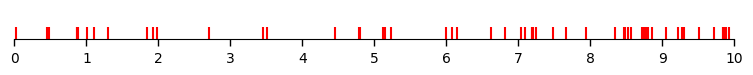

In [28]:
# Visualise output
plt.figure(figsize=(8,0.3))
ax = plt.subplot(111)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.scatter(x=EventTimes,y=[0]*len(EventTimes),marker="|",color="red",s=100)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.show()